# Notebook 01: Data Simulation Basics

Learn how to generate synthetic data and understand how parameters affect outcomes.

## Learning Objectives
- Generate various types of synthetic data
- Understand waveform parameters (amplitude, frequency, noise)
- Create classification and regression datasets
- Visualize data distributions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import (
    make_classification, make_regression, make_moons, 
    make_circles, make_blobs, make_gaussian_quantiles
)
import seaborn as sns

np.random.seed(42)
plt.style.use('seaborn-v0_8-whitegrid')

## Part 1: Waveform Generation

Understanding signal parameters through synthetic waveforms.

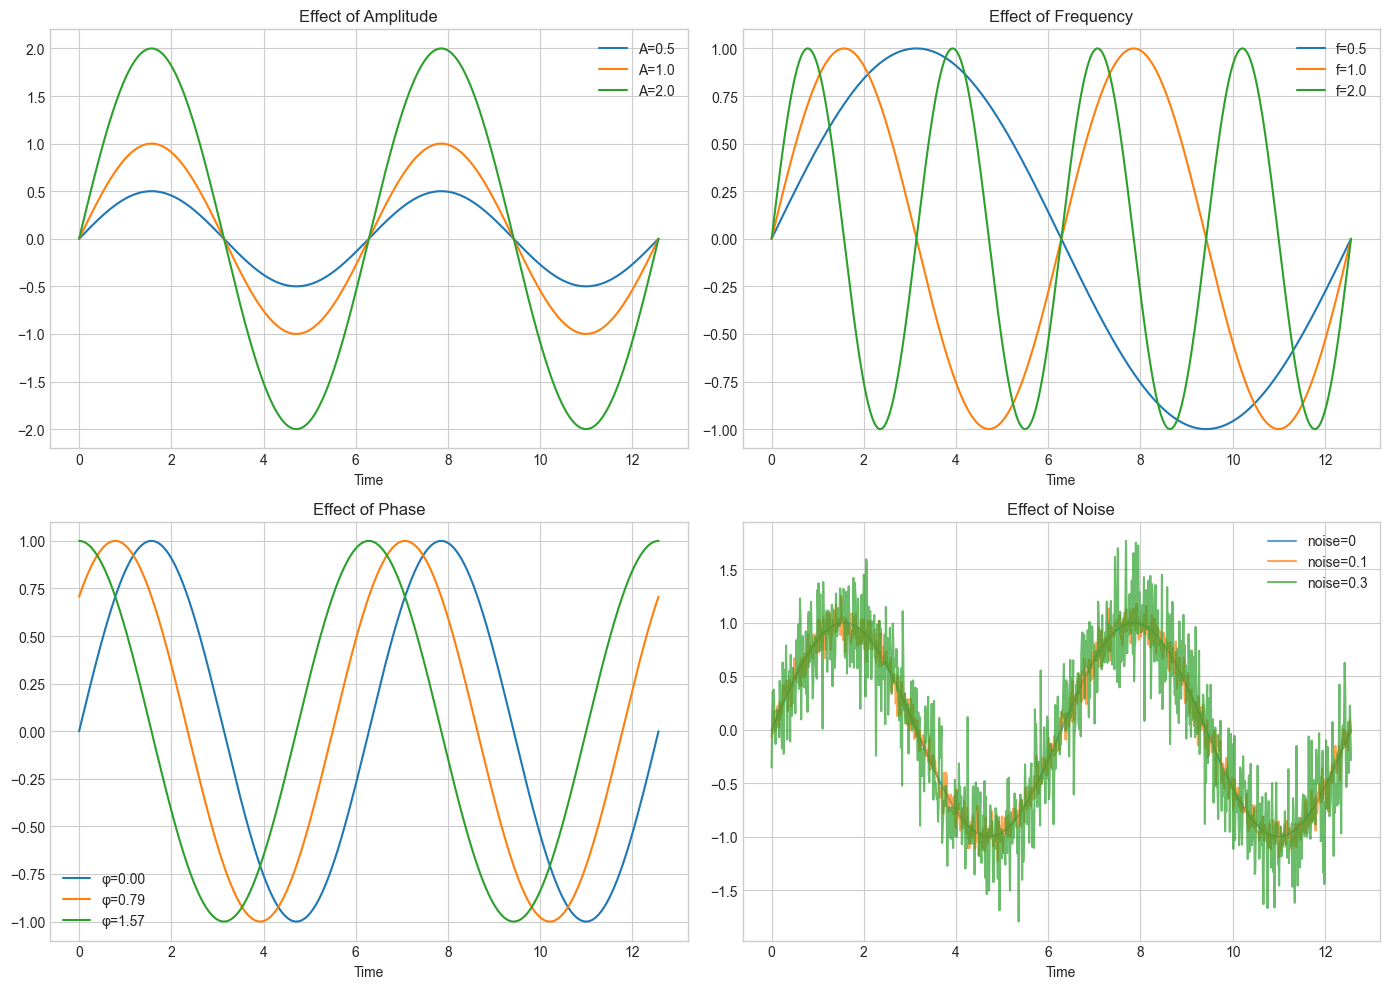

In [2]:
# Generate time series
t = np.linspace(0, 4 * np.pi, 1000)

# Basic sine wave
y_sine = np.sin(t)

# Parameterized waveforms
def generate_waveform(t, amplitude=1.0, frequency=1.0, phase=0, noise_level=0):
    """Generate a sine waveform with controllable parameters."""
    signal = amplitude * np.sin(frequency * t + phase)
    noise = noise_level * np.random.randn(len(t))
    return signal + noise

# Visualize parameter effects
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Amplitude variation
for amp in [0.5, 1.0, 2.0]:
    axes[0, 0].plot(t, generate_waveform(t, amplitude=amp), label=f'A={amp}')
axes[0, 0].set_title('Effect of Amplitude')
axes[0, 0].legend()
axes[0, 0].set_xlabel('Time')

# Frequency variation
for freq in [0.5, 1.0, 2.0]:
    axes[0, 1].plot(t, generate_waveform(t, frequency=freq), label=f'f={freq}')
axes[0, 1].set_title('Effect of Frequency')
axes[0, 1].legend()
axes[0, 1].set_xlabel('Time')

# Phase variation
for phase in [0, np.pi/4, np.pi/2]:
    axes[1, 0].plot(t, generate_waveform(t, phase=phase), label=f'φ={phase:.2f}')
axes[1, 0].set_title('Effect of Phase')
axes[1, 0].legend()
axes[1, 0].set_xlabel('Time')

# Noise variation
for noise in [0, 0.1, 0.3]:
    axes[1, 1].plot(t, generate_waveform(t, noise_level=noise), label=f'noise={noise}', alpha=0.7)
axes[1, 1].set_title('Effect of Noise')
axes[1, 1].legend()
axes[1, 1].set_xlabel('Time')

plt.tight_layout()
plt.show()

## Part 2: Complex Waveforms

Combining multiple signals to create complex patterns.

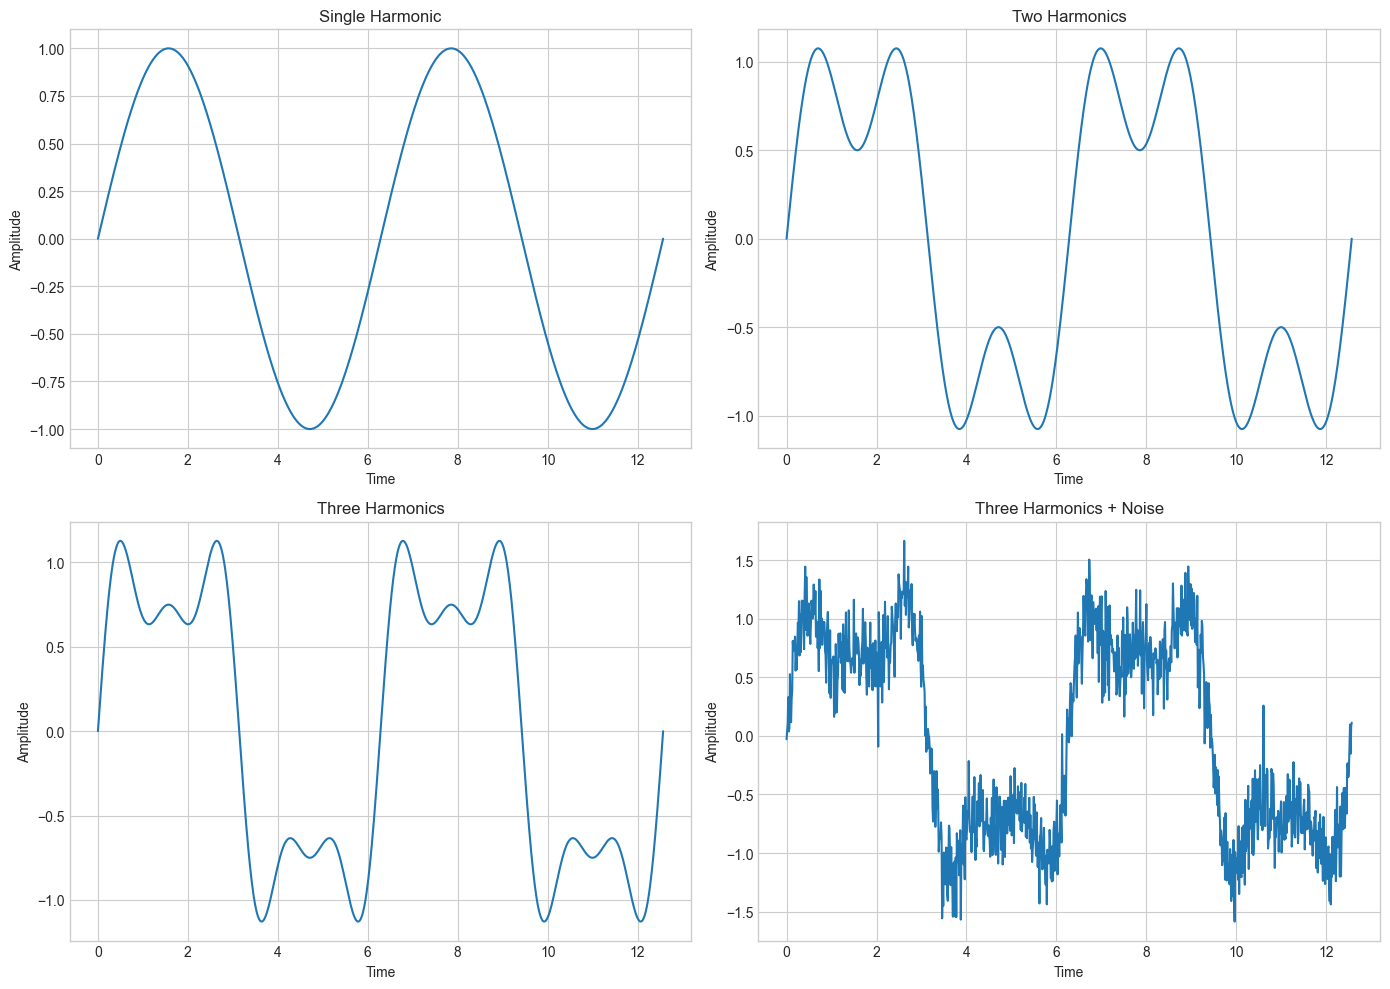

In [3]:
# Complex waveform: sum of sines (Fourier-like)
def complex_waveform(t, harmonics=[(1, 1), (3, 0.5), (5, 0.25)], noise=0.1):
    """
    Generate complex waveform from multiple harmonics.
    harmonics: list of (frequency_multiplier, amplitude) tuples
    """
    signal = np.zeros_like(t)
    for freq_mult, amp in harmonics:
        signal += amp * np.sin(freq_mult * t)
    return signal + noise * np.random.randn(len(t))

# Different harmonic combinations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Simple sine
axes[0, 0].plot(t, complex_waveform(t, [(1, 1)], noise=0))
axes[0, 0].set_title('Single Harmonic')

# Two harmonics
axes[0, 1].plot(t, complex_waveform(t, [(1, 1), (3, 0.5)], noise=0))
axes[0, 1].set_title('Two Harmonics')

# Three harmonics
axes[1, 0].plot(t, complex_waveform(t, [(1, 1), (3, 0.5), (5, 0.25)], noise=0))
axes[1, 0].set_title('Three Harmonics')

# Three harmonics with noise
axes[1, 1].plot(t, complex_waveform(t, [(1, 1), (3, 0.5), (5, 0.25)], noise=0.2))
axes[1, 1].set_title('Three Harmonics + Noise')

for ax in axes.ravel():
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

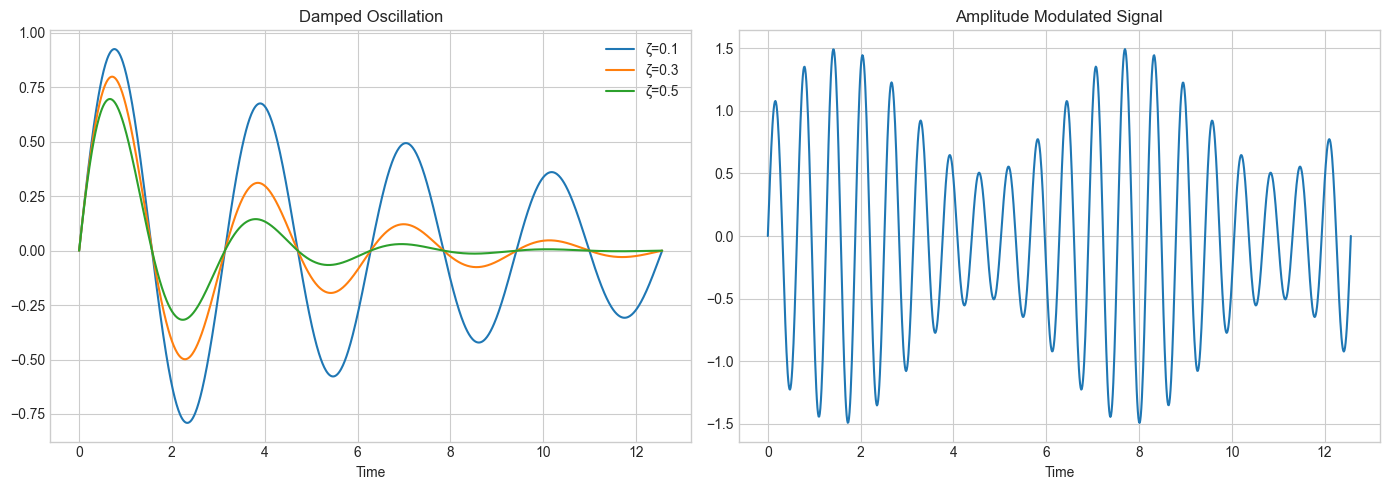

In [4]:
# Damped oscillation
def damped_oscillation(t, amplitude=1, frequency=2, damping=0.3, noise=0):
    """Generate a damped sinusoidal signal."""
    signal = amplitude * np.exp(-damping * t) * np.sin(frequency * t)
    return signal + noise * np.random.randn(len(t))

# Modulated signal
def am_modulation(t, carrier_freq=10, mod_freq=1, mod_depth=0.5):
    """Generate amplitude modulated signal."""
    carrier = np.sin(carrier_freq * t)
    modulator = 1 + mod_depth * np.sin(mod_freq * t)
    return carrier * modulator

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Damped oscillation with different damping
for damp in [0.1, 0.3, 0.5]:
    axes[0].plot(t, damped_oscillation(t, damping=damp), label=f'ζ={damp}')
axes[0].set_title('Damped Oscillation')
axes[0].legend()
axes[0].set_xlabel('Time')

# AM modulation
axes[1].plot(t, am_modulation(t))
axes[1].set_title('Amplitude Modulated Signal')
axes[1].set_xlabel('Time')

plt.tight_layout()
plt.show()

## Part 3: Classification Datasets

Generating synthetic classification data with sklearn.

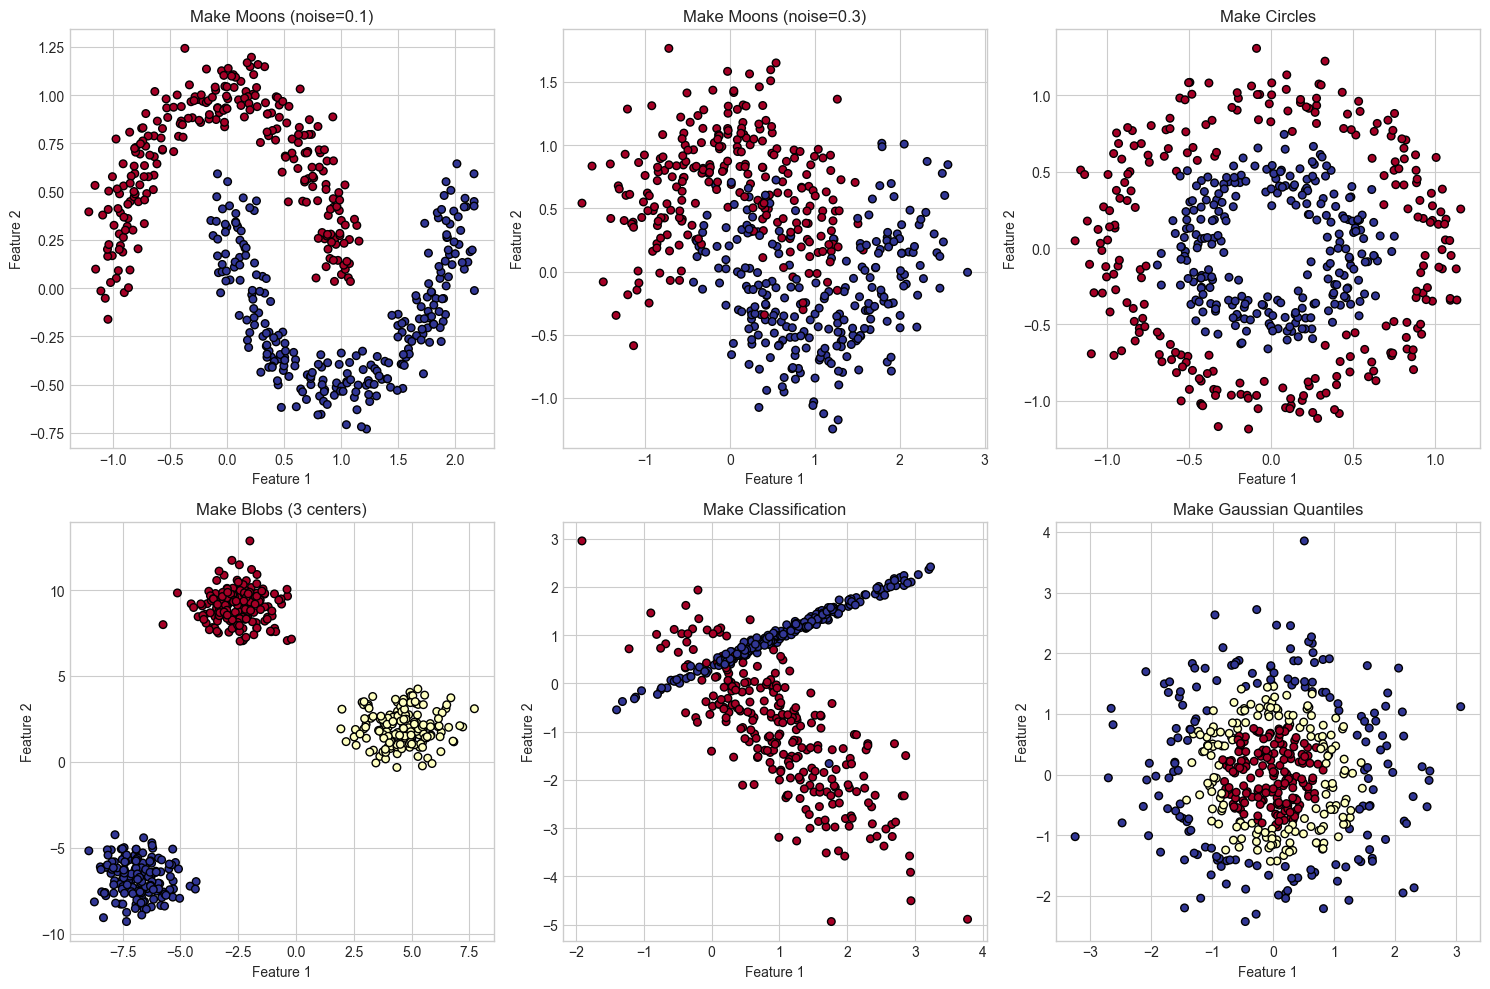

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Make Moons
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)
axes[0, 0].scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='black', s=30)
axes[0, 0].set_title('Make Moons (noise=0.1)')

# Make Moons - more noise
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
axes[0, 1].scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='black', s=30)
axes[0, 1].set_title('Make Moons (noise=0.3)')

# Make Circles
X, y = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)
axes[0, 2].scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='black', s=30)
axes[0, 2].set_title('Make Circles')

# Make Blobs
X, y = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)
axes[1, 0].scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='black', s=30)
axes[1, 0].set_title('Make Blobs (3 centers)')

# Make Classification
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, 
                          n_redundant=0, n_clusters_per_class=1, random_state=42)
axes[1, 1].scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='black', s=30)
axes[1, 1].set_title('Make Classification')

# Make Gaussian Quantiles
X, y = make_gaussian_quantiles(n_samples=500, n_features=2, n_classes=3, random_state=42)
axes[1, 2].scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='black', s=30)
axes[1, 2].set_title('Make Gaussian Quantiles')

for ax in axes.ravel():
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

## Part 4: Regression Datasets

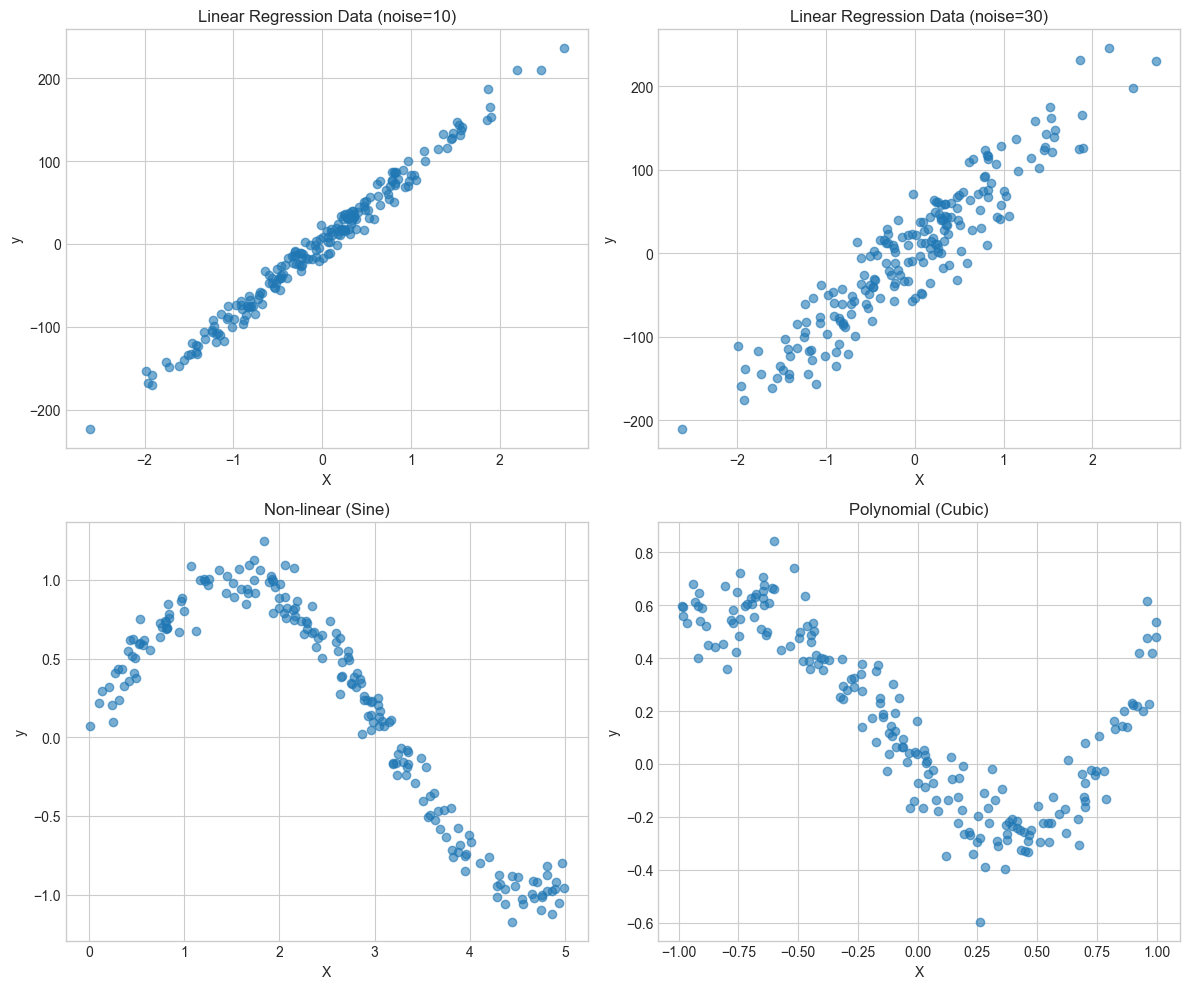

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Linear regression data
X, y = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)
axes[0, 0].scatter(X, y, alpha=0.6)
axes[0, 0].set_title('Linear Regression Data (noise=10)')

# More noise
X, y = make_regression(n_samples=200, n_features=1, noise=30, random_state=42)
axes[0, 1].scatter(X, y, alpha=0.6)
axes[0, 1].set_title('Linear Regression Data (noise=30)')

# Non-linear data
X = np.sort(5 * np.random.rand(200, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(200) * 0.1
axes[1, 0].scatter(X, y, alpha=0.6)
axes[1, 0].set_title('Non-linear (Sine)')

# Polynomial data
X = np.sort(2 * np.random.rand(200, 1) - 1, axis=0)
y = (X ** 3 + 0.5 * X ** 2 - X).ravel() + np.random.randn(200) * 0.1
axes[1, 1].scatter(X, y, alpha=0.6)
axes[1, 1].set_title('Polynomial (Cubic)')

for ax in axes.ravel():
    ax.set_xlabel('X')
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()

## Part 5: Understanding make_classification Parameters

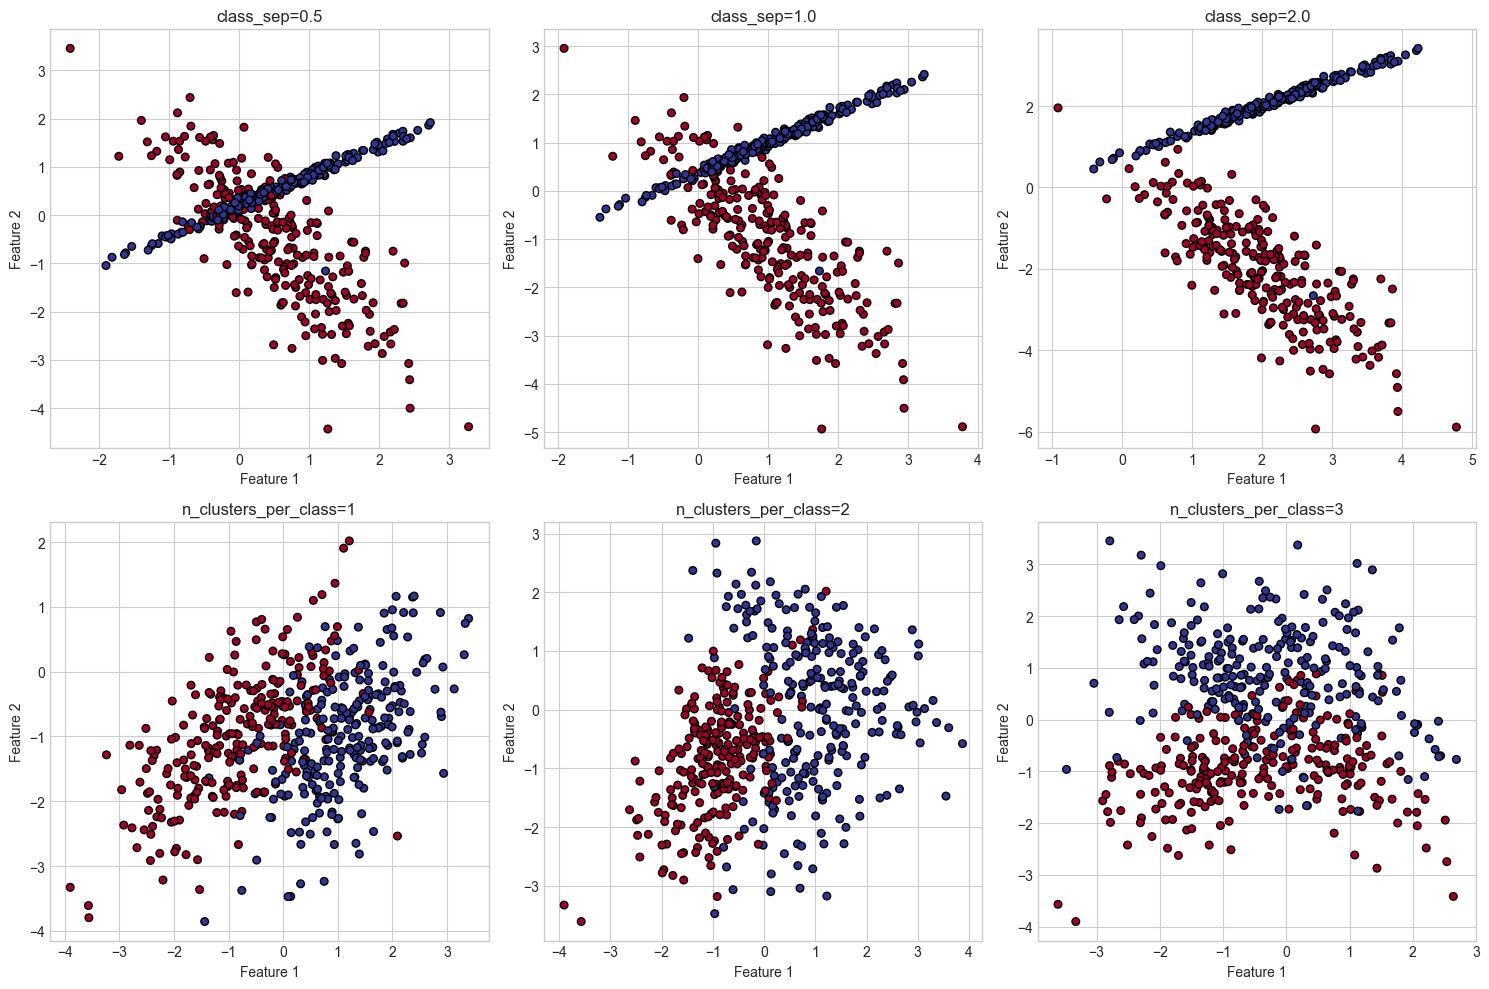

In [7]:
# Explore make_classification parameters
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Different class separations
for idx, sep in enumerate([0.5, 1.0, 2.0]):
    X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                              n_redundant=0, n_clusters_per_class=1,
                              class_sep=sep, random_state=42)
    axes[0, idx].scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='black', s=30)
    axes[0, idx].set_title(f'class_sep={sep}')

# Different number of clusters per class
for idx, n_clusters in enumerate([1, 2, 3]):
    X, y = make_classification(n_samples=500, n_features=3, n_informative=3,
                              n_redundant=0, n_clusters_per_class=n_clusters,
                              class_sep=1.0, random_state=42)
    axes[1, idx].scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='black', s=30)
    axes[1, idx].set_title(f'n_clusters_per_class={n_clusters}')

for ax in axes.ravel():
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

## Part 6: Multi-class and High-dimensional Data

Data shape: (1000, 20)
Number of classes: 4
Class distribution: [250 251 251 248]


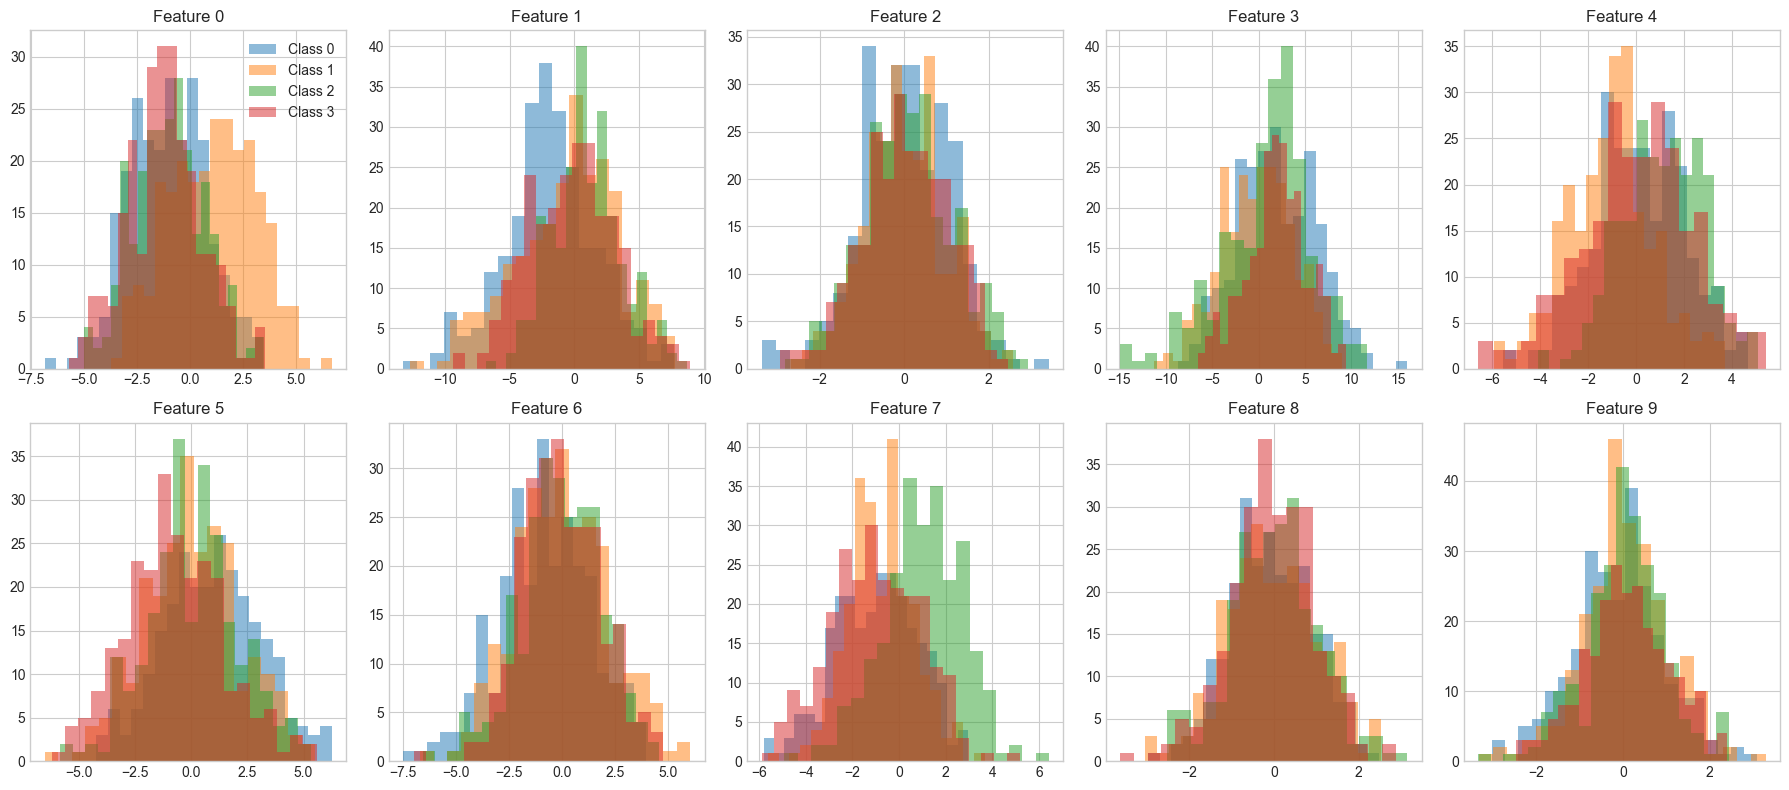

In [8]:
# Generate high-dimensional data
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_classes=4,
    n_clusters_per_class=2,
    random_state=42
)

print(f"Data shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")

# Visualize feature distributions
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.ravel()

for i in range(10):
    for cls in range(4):
        axes[i].hist(X[y == cls, i], bins=20, alpha=0.5, label=f'Class {cls}')
    axes[i].set_title(f'Feature {i}')
    if i == 0:
        axes[i].legend()

plt.tight_layout()
plt.show()

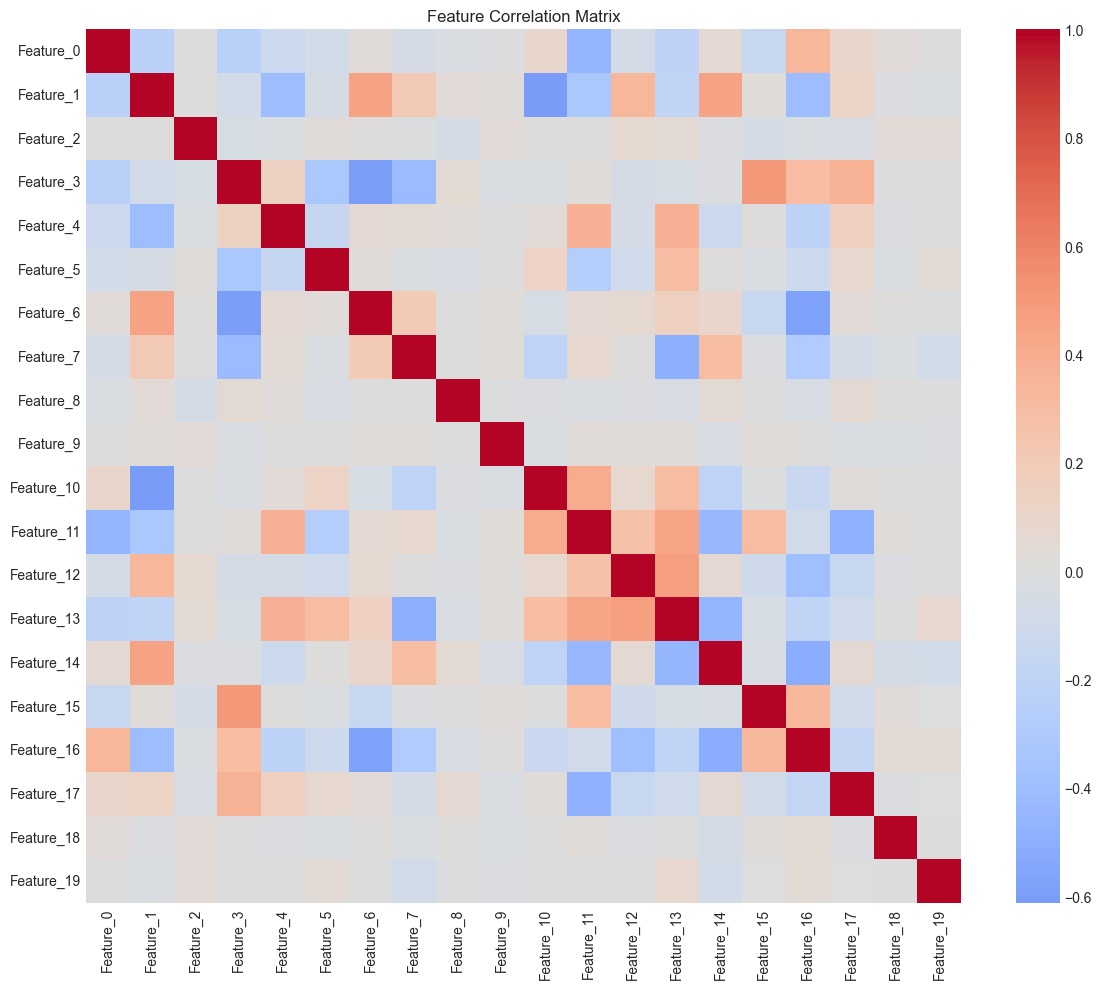

In [9]:
# Correlation matrix of features
import pandas as pd

df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

## Part 7: Creating Custom Datasets for Specific Patterns

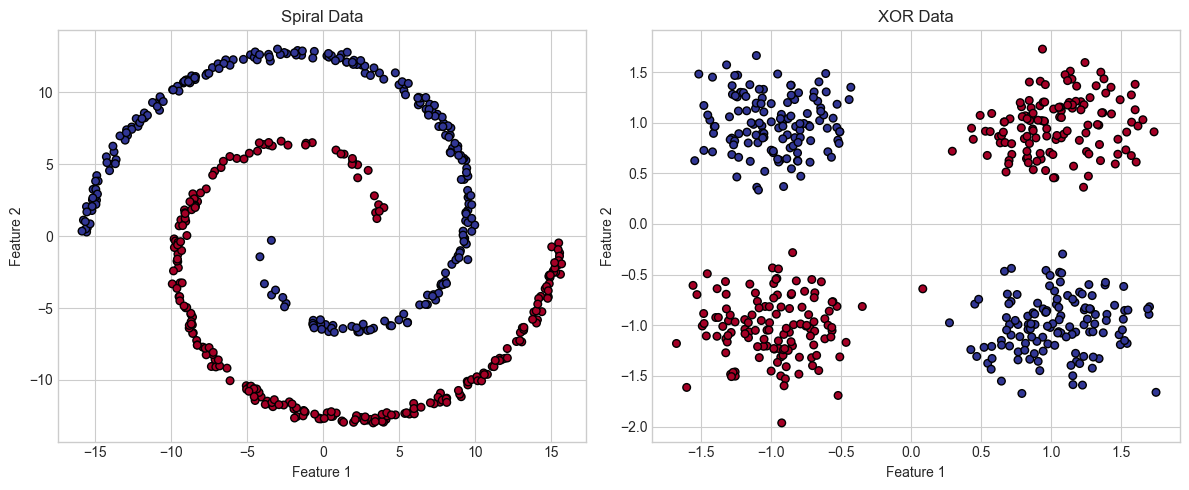

In [10]:
def create_spiral_data(n_samples=500, noise=0.2):
    """Create spiral classification data."""
    n = n_samples // 2
    
    # First spiral
    theta1 = np.sqrt(np.random.rand(n)) * 2 * np.pi
    r1 = 2 * theta1 + np.pi
    x1 = r1 * np.cos(theta1) + np.random.randn(n) * noise
    y1 = r1 * np.sin(theta1) + np.random.randn(n) * noise
    
    # Second spiral
    theta2 = np.sqrt(np.random.rand(n)) * 2 * np.pi
    r2 = -2 * theta2 - np.pi
    x2 = r2 * np.cos(theta2) + np.random.randn(n) * noise
    y2 = r2 * np.sin(theta2) + np.random.randn(n) * noise
    
    X = np.vstack([np.column_stack([x1, y1]), np.column_stack([x2, y2])])
    y = np.hstack([np.zeros(n), np.ones(n)])
    
    return X, y.astype(int)

def create_xor_data(n_samples=500, noise=0.1):
    """Create XOR pattern data."""
    n = n_samples // 4
    
    # Four quadrants
    X1 = np.random.randn(n, 2) * noise + [1, 1]
    X2 = np.random.randn(n, 2) * noise + [-1, -1]
    X3 = np.random.randn(n, 2) * noise + [1, -1]
    X4 = np.random.randn(n, 2) * noise + [-1, 1]
    
    X = np.vstack([X1, X2, X3, X4])
    y = np.hstack([np.zeros(n), np.zeros(n), np.ones(n), np.ones(n)])
    
    return X, y.astype(int)

# Visualize custom datasets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

X_spiral, y_spiral = create_spiral_data()
axes[0].scatter(X_spiral[:, 0], X_spiral[:, 1], c=y_spiral, cmap='RdYlBu', 
                edgecolors='black', s=30)
axes[0].set_title('Spiral Data')

X_xor, y_xor = create_xor_data(noise=0.3)
axes[1].scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor, cmap='RdYlBu', 
                edgecolors='black', s=30)
axes[1].set_title('XOR Data')

for ax in axes:
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

## Summary

In this notebook, you learned:

1. **Waveform generation** with controllable parameters (amplitude, frequency, phase, noise)
2. **Complex signals** from harmonic combinations and modulations
3. **Classification datasets**: make_moons, make_circles, make_blobs, make_classification
4. **Regression datasets**: linear and non-linear
5. **Parameter effects** on data complexity and separability
6. **Custom dataset creation** for specific patterns

### Key Takeaways
- **noise** parameter controls difficulty of the problem
- **class_sep** controls how separable classes are
- **n_informative** vs **n_redundant** affects feature usefulness
- Complex patterns (spiral, XOR) require non-linear models

### Next Steps
Continue to **Notebook 02** to learn about preprocessing and feature engineering.